In [20]:
import pandas as pd


Import books and ratings data from CSV files

In [21]:
df_books_data_large = pd.read_csv("../data/raw/books_data.csv")
df_ratings_data_large = pd.read_csv("../data/raw/Books_rating.csv")

### Let's first analyze df_books_data_large data

In [22]:
df_books_data_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


###### All the columns contain text data except ratingsCount column. Let's quickly check what the actual data looks like in the columns using head command

In [23]:
df_books_data_large.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [24]:
df_books_data_large.describe()

,ratingsCount
count,49752.000000
mean,21.252975
std,201.340431
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4895.000000


#### Only one numerical column is there - ratingsCount. The column has a limited utility and may be removed in the subsequent steps

In [25]:
df_books_data_large.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

#### There are several null values spread across different columns. One null value that we will deal with right now is Title as without it the row is of limited use 

In [26]:
#We will remove the row with missing title as we we don't have any information about that title
df_books_data_large = df_books_data_large[~df_books_data_large['Title'].isna()]

#### We will drop the columns - Image, previewLink, infoLink - as they are not important in developing a book recommendation. Also, we will drop 'ratingsCount' column as most of the values are null and we can generate actual values from the other dataset


In [27]:
df_books_selected_columns = df_books_data_large.drop(['image', 'previewLink', 'infoLink','ratingsCount'],axis=1
)
df_books_selected_columns.head(5)

,Title,description,authors,publisher,publishedDate,categories
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],NaN,2000,['Religion']
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005-02,['Fiction']
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,2003-03-01,NaN


#### Let's further analyze how the null values are spread across different columns

<Axes: >

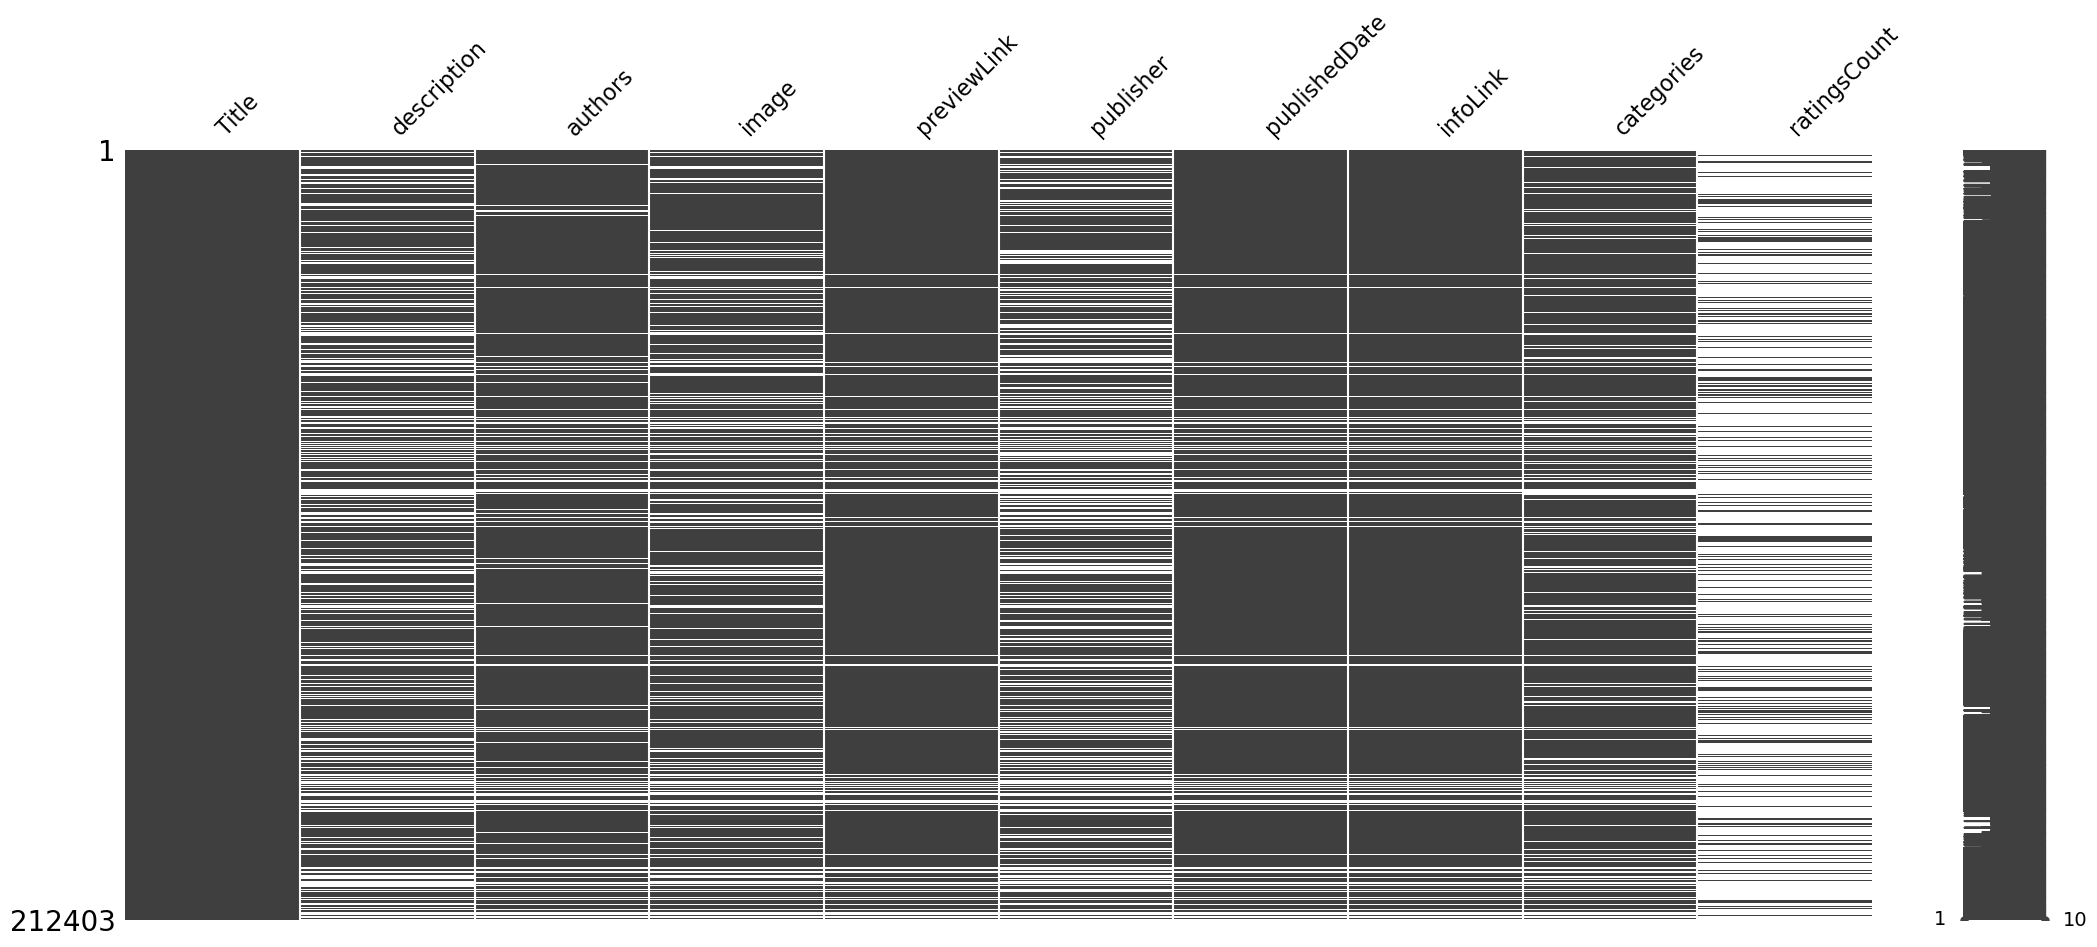

In [28]:
import missingno as msno
%matplotlib inline
msno.matrix(df_books_data_large)

#### Still there are many null values in different columns. 'ratingsCount' column clearly stands out in terms of having different null values. 

#### The other columns that have considerable null values are description and publisher. We may need to figure out a way to deal with them in the future

We will not do anything for now until we go into data exploration stage. We will now deep dive in df_ratings_data_large

### Let's analyze the Ratings data now

In [16]:
df_ratings_data_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   User_id             object 
 3   profileName         object 
 4   review/helpfulness  object 
 5   review/score        float64
 6   review/time         int64  
 7   review/summary      object 
 8   review/text         object 
dtypes: float64(1), int64(1), object(7)
memory usage: 206.0+ MB


### Most of the column are string except review/score and review/time. Review/time column may removed in the subsequent steps. Let's now see what the actual data looks like using head

In [17]:
df_ratings_data_large.head(5)

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


##### Let's also do a quick describe to further explore the data

In [30]:
df_ratings_data_large.describe()

,Price,review/score,review/time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


### One interesting observation around the reivew/score. It looks like most of the values are 4 or 5. We further explore these values in the EDA stage

#### Let's also see the what the shape of the rating data looks like. 

In [8]:
df_ratings_data_large.shape

(3000000, 10)

###### We have close to 3 MM records, which is huge. We may need to trim down the records in the future but nothing much to be done for now.
###### We will now look for null values in the data set and how they are spread across the data

In [9]:
df_ratings_data_large.isnull().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

#### Price has the most null values but it may not be most important feature in the dataset. We have several null values for user_id and profilename column as well. Let's now visualize how the null values are spread across the database

<Axes: >

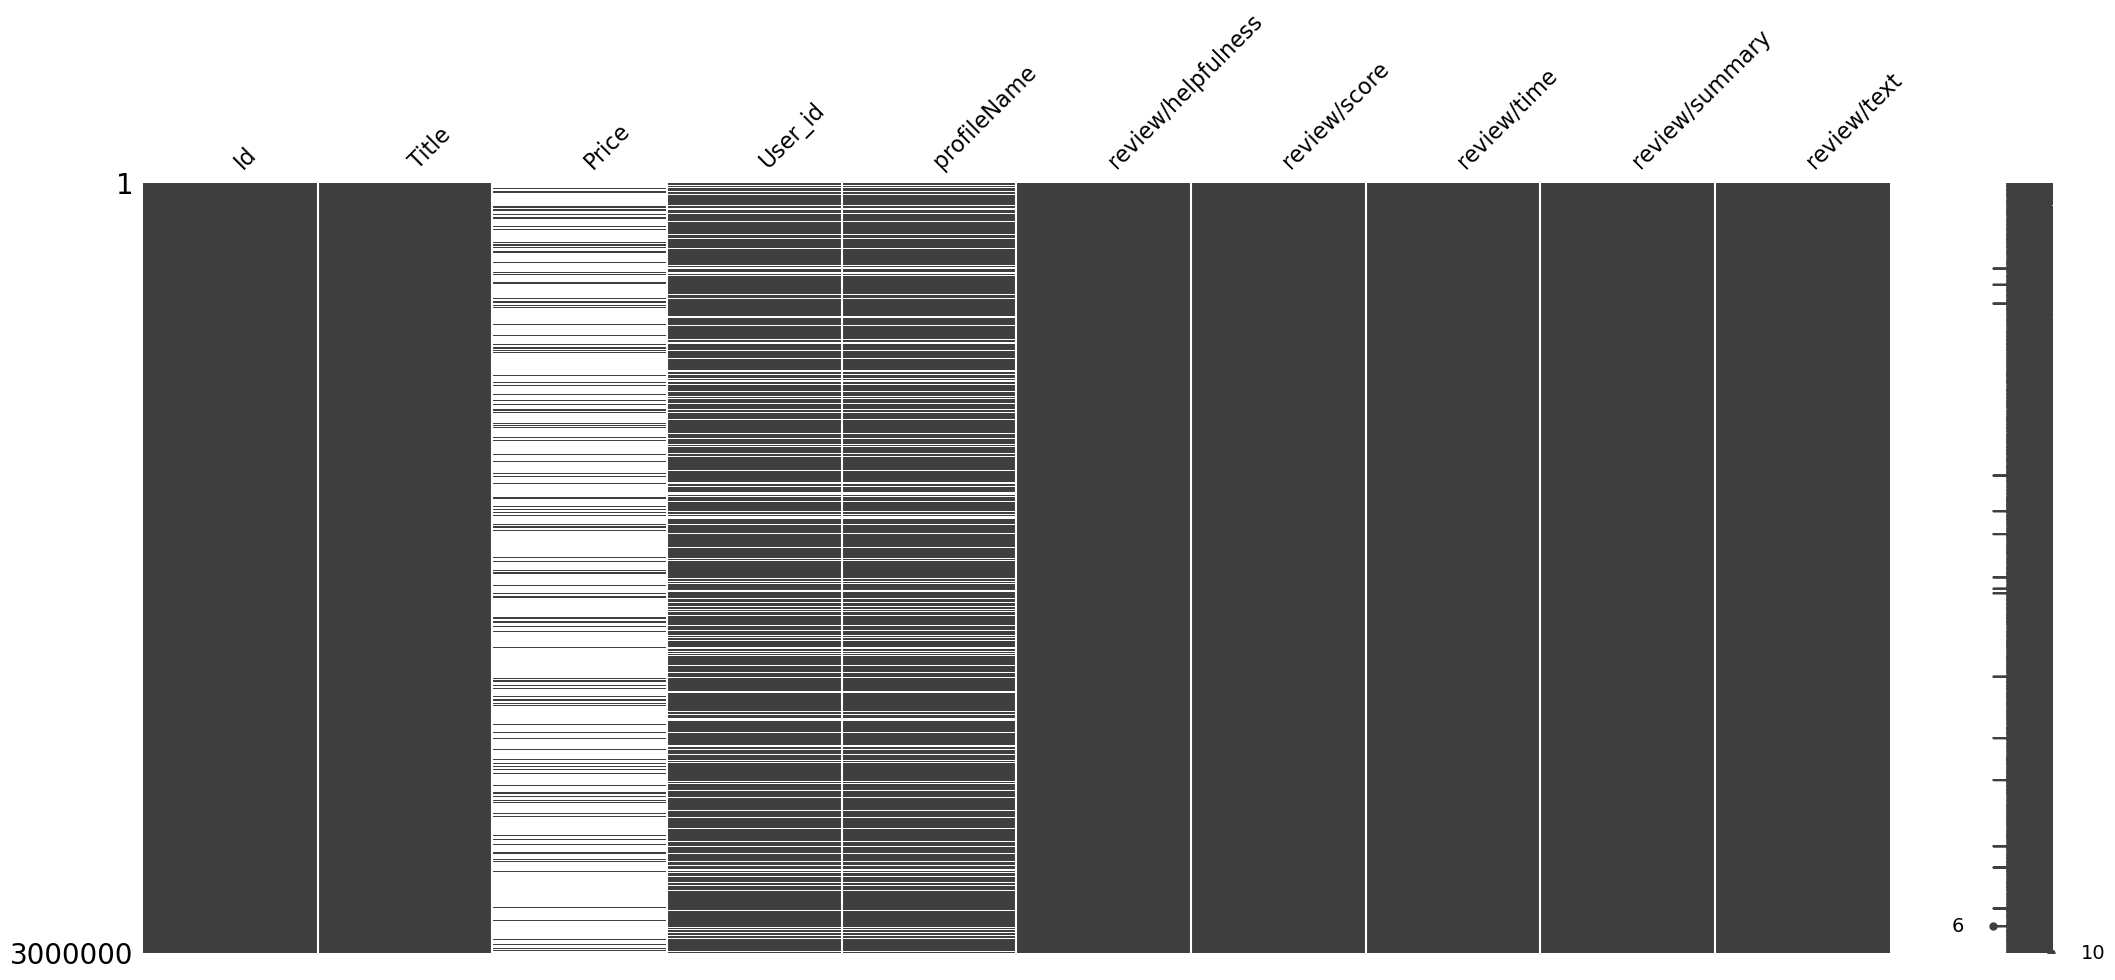

In [29]:
msno.matrix(df_ratings_data_large)

#### As observed before, price data is mostly null so we should drop it.

In [10]:
#Price is mostly null so we will drop the column
df_ratings_data_large = df_ratings_data_large.drop(['Price'],axis=1)

In [11]:
df_ratings_data_large.head(5)

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


#### Let's now deep dive in the text data. 

#### First, we will look into review/summary column

In [44]:
df_ratings_data_large["review/summary"].isna().sum()

407

In [48]:
df_ratings_data_large["review/summary"].sample(250)

1334932    Not quite what the title promises which is a c...
646749     Meyers Handbook on Petroleum Refining Processe...
1092395                                              Old Man
241649                                          Disappointed
2346502                                         Clancys best
                                 ...                        
1744211    A must read on drug effectiveness and commerci...
1005163                         refuge for a cool spring day
39407                                     The Anger Wrokbook
2225498                                  An excellent primer
738585                                         Still topical
Name: review/summary, Length: 250, dtype: object

### We see that we need to change the text case and lower the case. We will also remove the punctuation to make the text cleaner

### First, we define a function that removes punctuation and call the function on the column. The function should take care of all the null values as well due to the else part

In [45]:
import string
string.punctuation
def remove_punctuation(text):
    if (isinstance(text, str)):
        punctuationfree="".join([i for i in text if i not in string.punctuation])
        return punctuationfree
    else:
        return ""

In [46]:
df_ratings_data_large["review/summary"] = df_ratings_data_large["review/summary"].apply(lambda x: remove_punctuation(x))

In [47]:
df_ratings_data_large["review/summary"].isna().sum()

0

In [50]:
df_ratings_data_large["review/summary"]= df_ratings_data_large["review/summary"].apply(lambda x: x.lower())

#### Clearly the null values are gone as they should be replaced by empty string. Let's look in a few random samples how the text looks like now.

In [51]:
df_ratings_data_large["review/summary"].sample(250)

2206967                               another excellent book
1028890                great read even better than the movie
91293                                         i dont like it
2480982                    a substantive work of scholarship
2127357        sweet story  easy to recommend  her best work
                                 ...                        
343012                       the clearest explanation i know
39012                               beware what you wish for
1243072                                   the best book ever
282517                  embedded ieee80211b required reading
260913     building up my library so no time to readthenr...
Name: review/summary, Length: 250, dtype: object

#### Let's take the similar steps for the reivew/text column

In [52]:
df_ratings_data_large["review/text"] = df_ratings_data_large["review/text"].apply(lambda x: remove_punctuation(x))
df_ratings_data_large["review/text"]= df_ratings_data_large["review/text"].apply(lambda x: x.lower())

#### Let's quickly check the review/text data now

In [54]:
df_ratings_data_large["review/text"].isna().sum()

0

In [53]:
df_ratings_data_large["review/text"].sample(250)

2310661    good story with elements of mystery  magicand ...
2509892    very good book it had you gripping your seat a...
636925     wonderful read ms austens characters are so al...
2366261    this volume published by the then fledgling in...
1462479    i hate it i hate it i hate it i hate it i hate...
                                 ...                        
264994     enchanted by the images of the movie b potter ...
429343     morris is one of my favorite authors because h...
1622468    how does griffiths manage to cram such a compr...
2034553    great quality as expected i grew up on golden ...
2389805    this is the best baby book ive ever used i onl...
Name: review/text, Length: 250, dtype: object

#### Clear the text is much cleaner and all the null values are gone.

#### We won't clean the data any further as it may lead a loss in the information and affect the performance of the language models

##### We will save the data now for the later steps. 

In [12]:
df_books_selected_columns.to_csv("../data/interim/post_wrangling_books.csv")
df_ratings_data_large.to_csv("../data/interim/post_wrangling_ratings.csv")

# Summary
1) I am using Amazon book review data set from Kaggle. Location - https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews. I have not added the data to Git as it is over 1 GB
2) I did a quick review of the dataset and removed columns that will not be needed for developing a recommendation system or performing NLP related tasks
3) I have kept most of the columns and rows for now (even though we have a lot of NAs, as I am not sure what modelling techniques will be used